In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [4]:
new_df =df.iloc[:,:-1]
new_df.head()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
new_df.shape

(150, 4)

In [6]:
from sklearn import cluster

In [7]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(new_df)
    error.append(kmeans.inertia_)

In [8]:
error

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25600931571815,
 46.44618205128204,
 39.03998724608725,
 34.299712121212146,
 30.014398496240617,
 28.03690635345049,
 26.534529220779234]

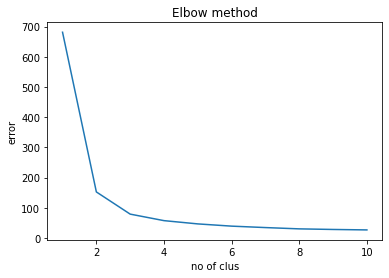

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [10]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)


In [11]:
km_model.fit(new_df)


KMeans(n_clusters=3, random_state=0)

In [12]:
ykmeans =km_model.predict(new_df)
ykmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [13]:
km_model.predict([[5.1,3.5,1.4,0.2]])

array([1])

In [14]:
new_df['kclus'] = pd.Series(ykmeans)

In [15]:
new_df.head()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),kclus
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [17]:
X= new_df.iloc[:,:-1]
X

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
y=new_df.kclus

In [20]:
# train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)